In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
plt.rcParams.update({'font.size': 8})

rng = np.random.default_rng(seed=41)

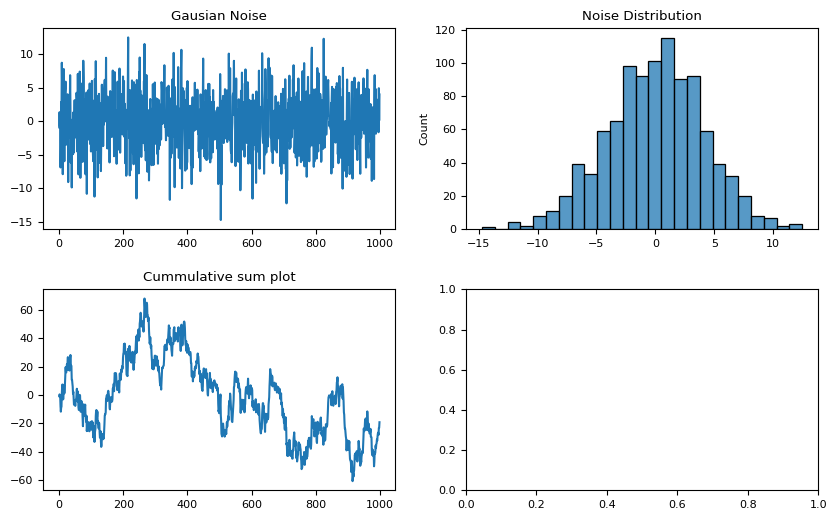

In [4]:
size = 1000

ints = rng.integers(low=0, high=100, size=size)

# Generate standard normal distribution (Gausian noise) of mean 0 and standard deviation of 4
n = rng.normal(loc=0, scale=4, size=size)

ints_with_noise = ints + n

fig, ax = plt.subplots(2,2, figsize=(10,6))
sns.lineplot(x=np.arange(len(n)), y=n, ax=ax[0][0]).set(title='Gausian Noise')
sns.histplot(n, ax=ax[0][1]).set(title='Noise Distribution')

sns.lineplot(x=np.arange(len(n)), y=np.cumsum(n), ax=ax[1][0]).set(title='Cummulative sum plot')

plt.subplots_adjust(hspace=0.3)

plt.show()

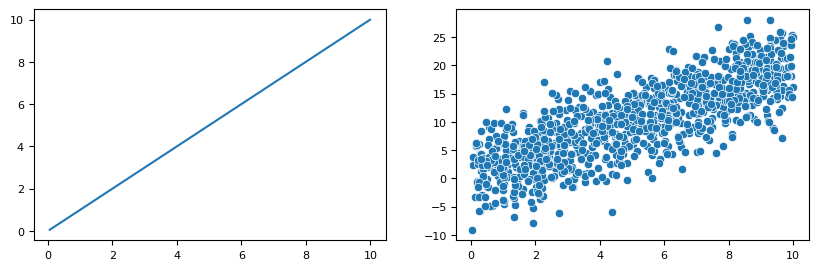

In [5]:
# y = mx + b

trend = rng.uniform(low=0, high=10,size=1000)
slop = 2
intercept = 0.5

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.lineplot(x=trend, y=trend, ax=ax1)
sns.scatterplot(x=trend, y= slop * trend + n, ax=ax2)
plt.show()

#### Generate simulated stock price time series

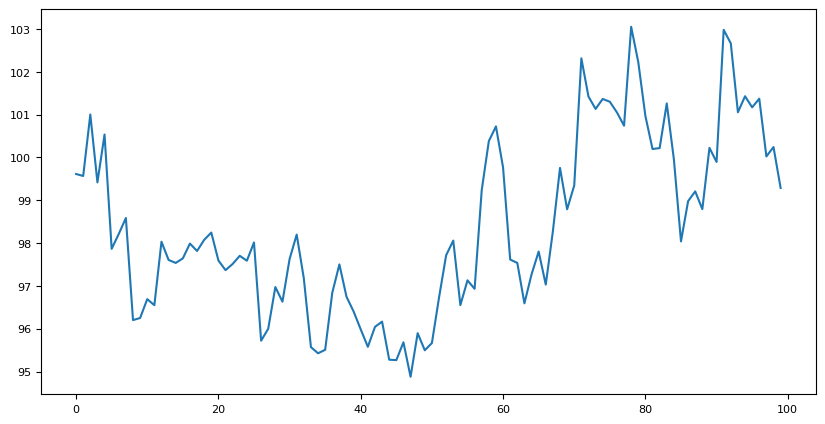

In [6]:
# Parameters
num_days = 100
initial_price = 100.0
volatility = 0.01  # Daily volatility

# Generate random daily returns
daily_returns = np.random.normal(loc=0, scale=volatility, size=num_days)

# Calculate the cumulative sum of returns to get the price
price = initial_price * np.exp(np.cumsum(daily_returns))

time = np.arange(num_days)

plt.figure(figsize=(10, 5))
plt.plot(time, price)
plt.show()

### Forecasting metrics

In [9]:
y_actual = np.array([2,4,5,8,9])
y_pred   = np.array([2,3,3,7,9])

# Sum of squared error
sse = np.sum(np.square(y_actual-y_pred))
print(f"Sum of squared error is {sse}")


mse = np.sum(np.square(y_actual-y_pred)) / len(y_actual)
print(f"Mean sum of squared error {mse}")

Sum of squared error is 6
Mean sum of squared error 1.2


### Simple Moving Average

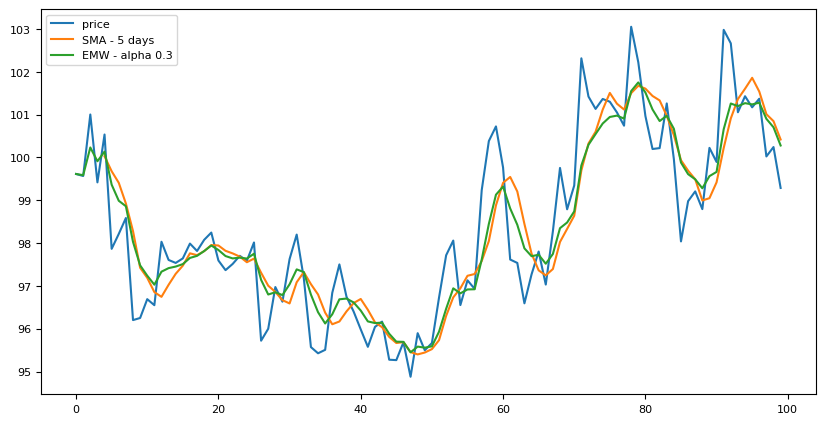

In [30]:
# Plot the simulated stock price
plt.figure(figsize=(10, 5))
plt.plot(time, price,  label="price")
days = 5
plt.plot(time, pd.DataFrame(price).rolling(days).mean(),label=f"SMA - {days} days")

smoothing_factor = 0.3
plt.plot(time, pd.DataFrame(price).ewm(alpha=smoothing_factor).mean(),label=f"EMW - alpha {smoothing_factor}")

plt.legend(loc="upper left")
plt.show()

### Check the stationary
1. Using calculating mean and variance of two subsets
2. Using Augmented Dickey-Fuller (ADF) Test